In [18]:
import pandas as pd

# Use the correct encoding
df = pd.read_csv(r"C:\Users\ganac\Downloads\Sample - Superstore.csv\Sample - Superstore.csv", encoding='ISO-8859-1')

# Display first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
print("Rows and Columns:", df.shape)
print("Column Names:\n", df.columns)
       # Column names

Rows and Columns: (9994, 21)
Column Names:
 Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [21]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [22]:
df.drop(columns=['Row ID', 'Postal Code'], inplace=True)


In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [24]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.day_name()


In [25]:
print("Total Sales: ₹", round(df['Sales'].sum(), 2))
print("Total Profit: ₹", round(df['Profit'].sum(), 2))


Total Sales: ₹ 2297200.86
Total Profit: ₹ 286397.02


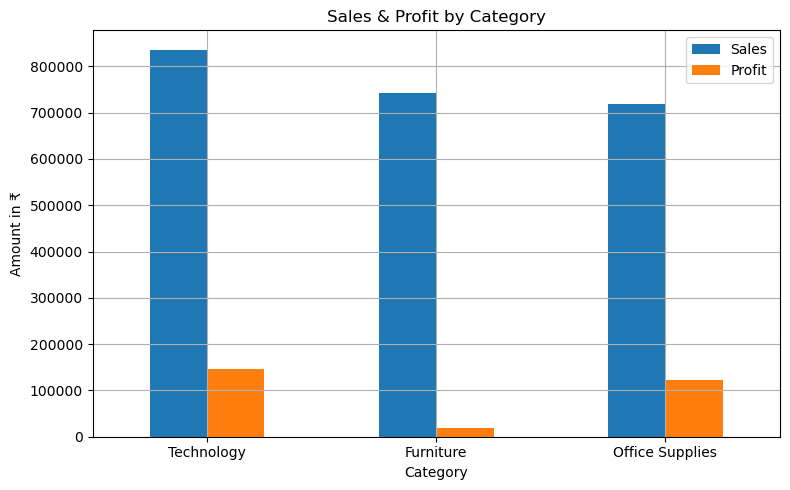

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_sales = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
cat_sales.plot(kind='bar', figsize=(8,5), title='Sales & Profit by Category')
plt.ylabel("Amount in ₹")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


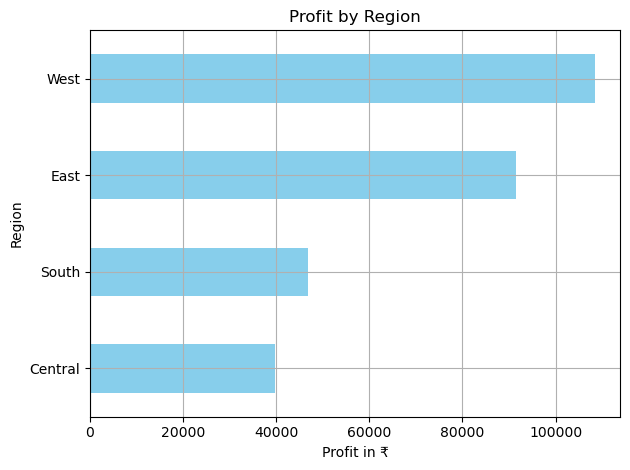

In [27]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit.plot(kind='barh', title='Profit by Region', color='skyblue')
plt.xlabel("Profit in ₹")
plt.grid(True)
plt.tight_layout()
plt.show()


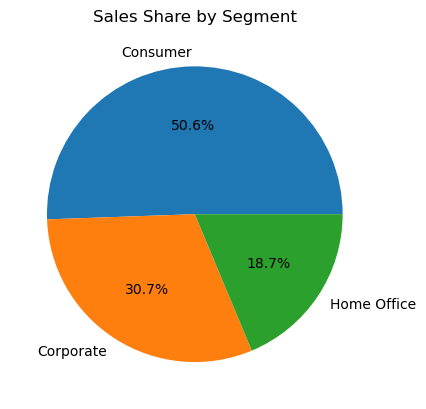

In [28]:
df.groupby('Segment')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', title='Sales Share by Segment')
plt.ylabel('')
plt.show()


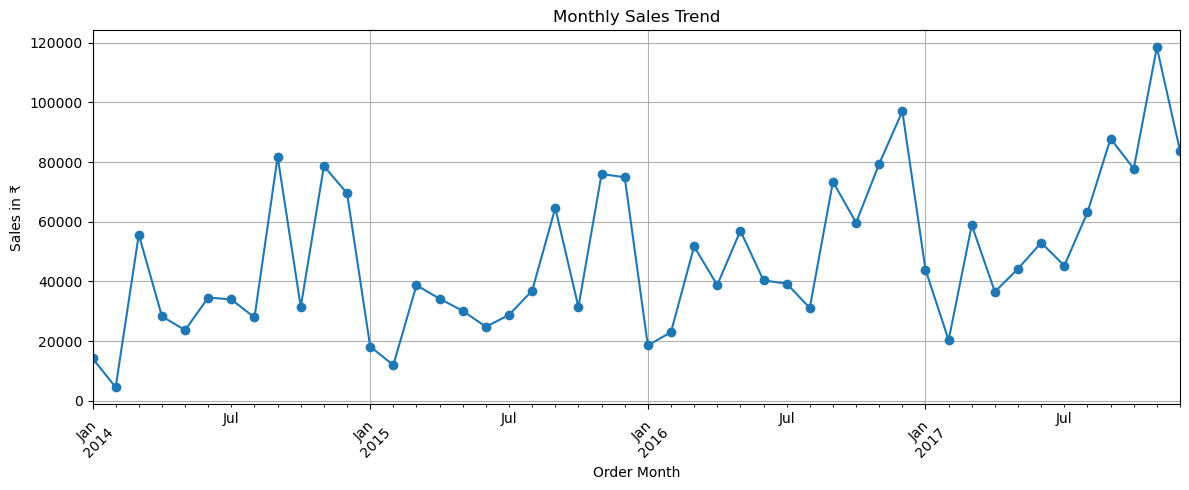

In [29]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(figsize=(12,5), marker='o', title='Monthly Sales Trend')
plt.ylabel("Sales in ₹")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


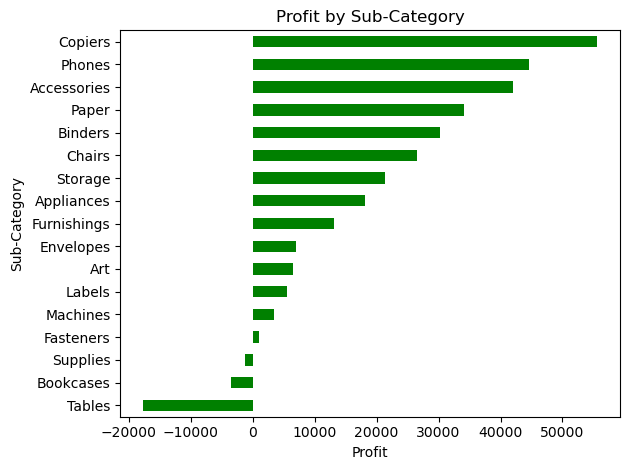

In [30]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.plot(kind='barh', color='green', title='Profit by Sub-Category')
plt.xlabel("Profit")
plt.tight_layout()
plt.show()


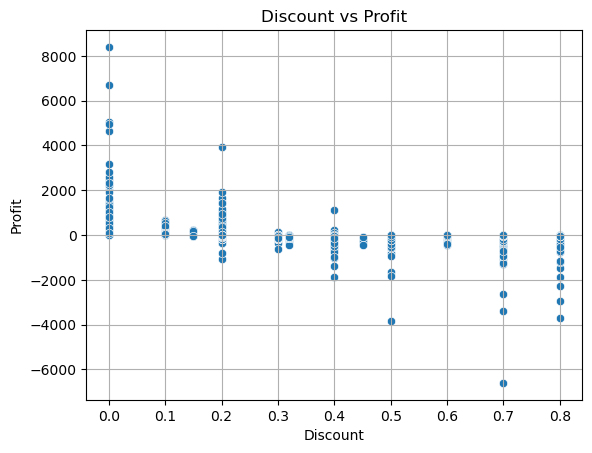

In [31]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.grid(True)
plt.show()


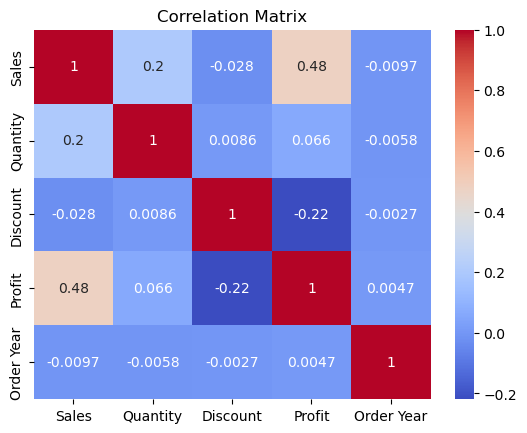

In [32]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [33]:
df.to_csv("Cleaned_Superstore.csv", index=False)
